Songs Table Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41652 entries, 0 to 41651
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           41652 non-null  object 
 1   song_name         41652 non-null  object 
 2   artist_ids        41652 non-null  object 
 3   acousticness      41652 non-null  float64
 4   danceability      41652 non-null  float64
 5   energy            41652 non-null  float64
 6   instrumentalness  41652 non-null  float64
 7   key               41652 non-null  int64  
 8   liveness          41652 non-null  float64
 9   loudness          41652 non-null  float64
 10  mode              41652 non-null  int64  
 11  speechiness       41652 non-null  float64
 12  tempo             41652 non-null  float64
 13  time_signature    41652 non-null  int64  
 14  valence           41652 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.8+ MB
None

So

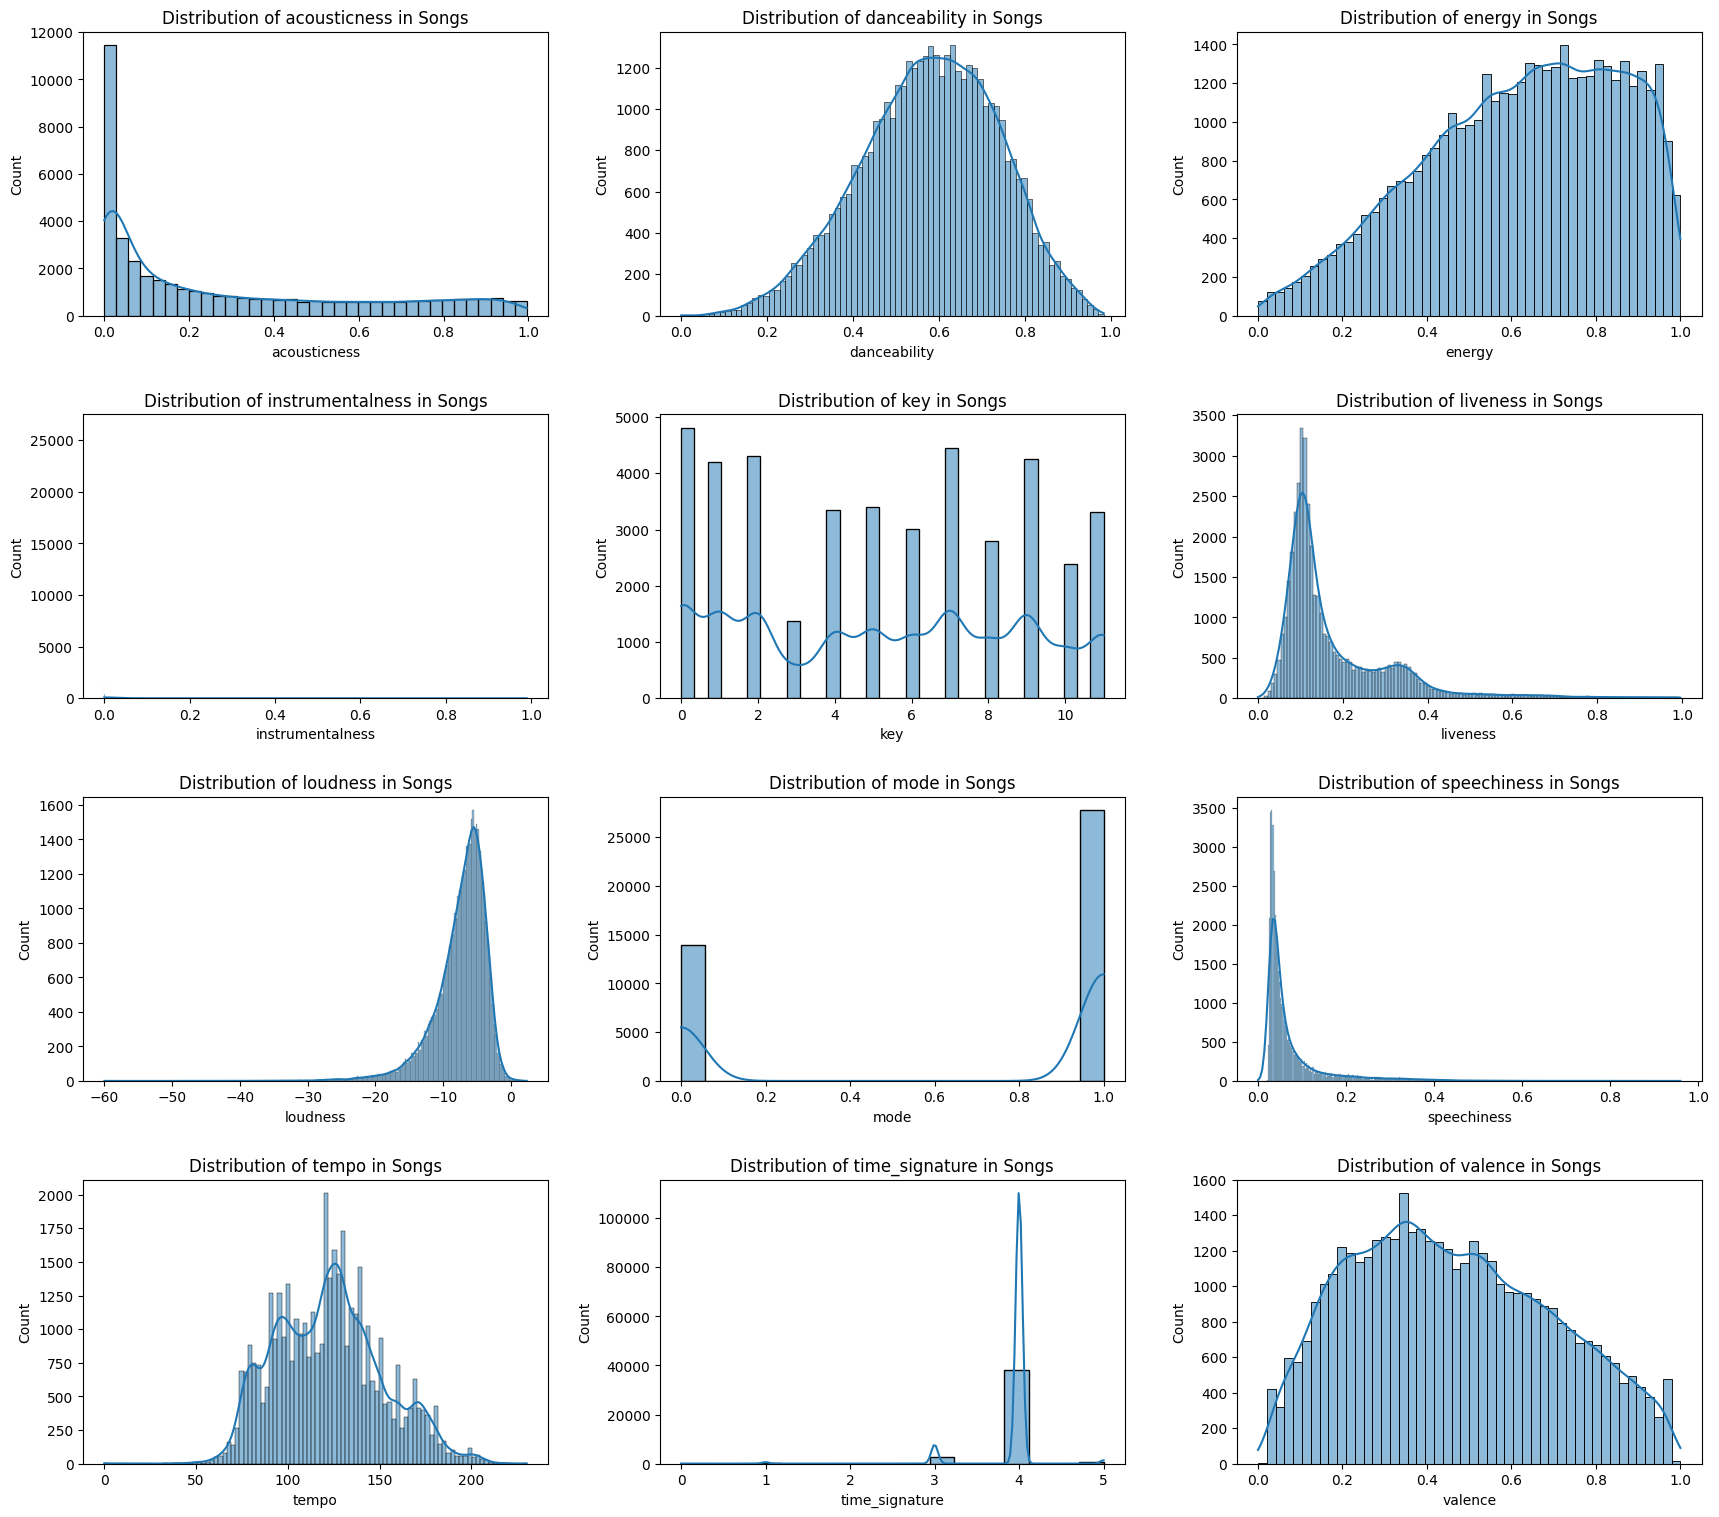

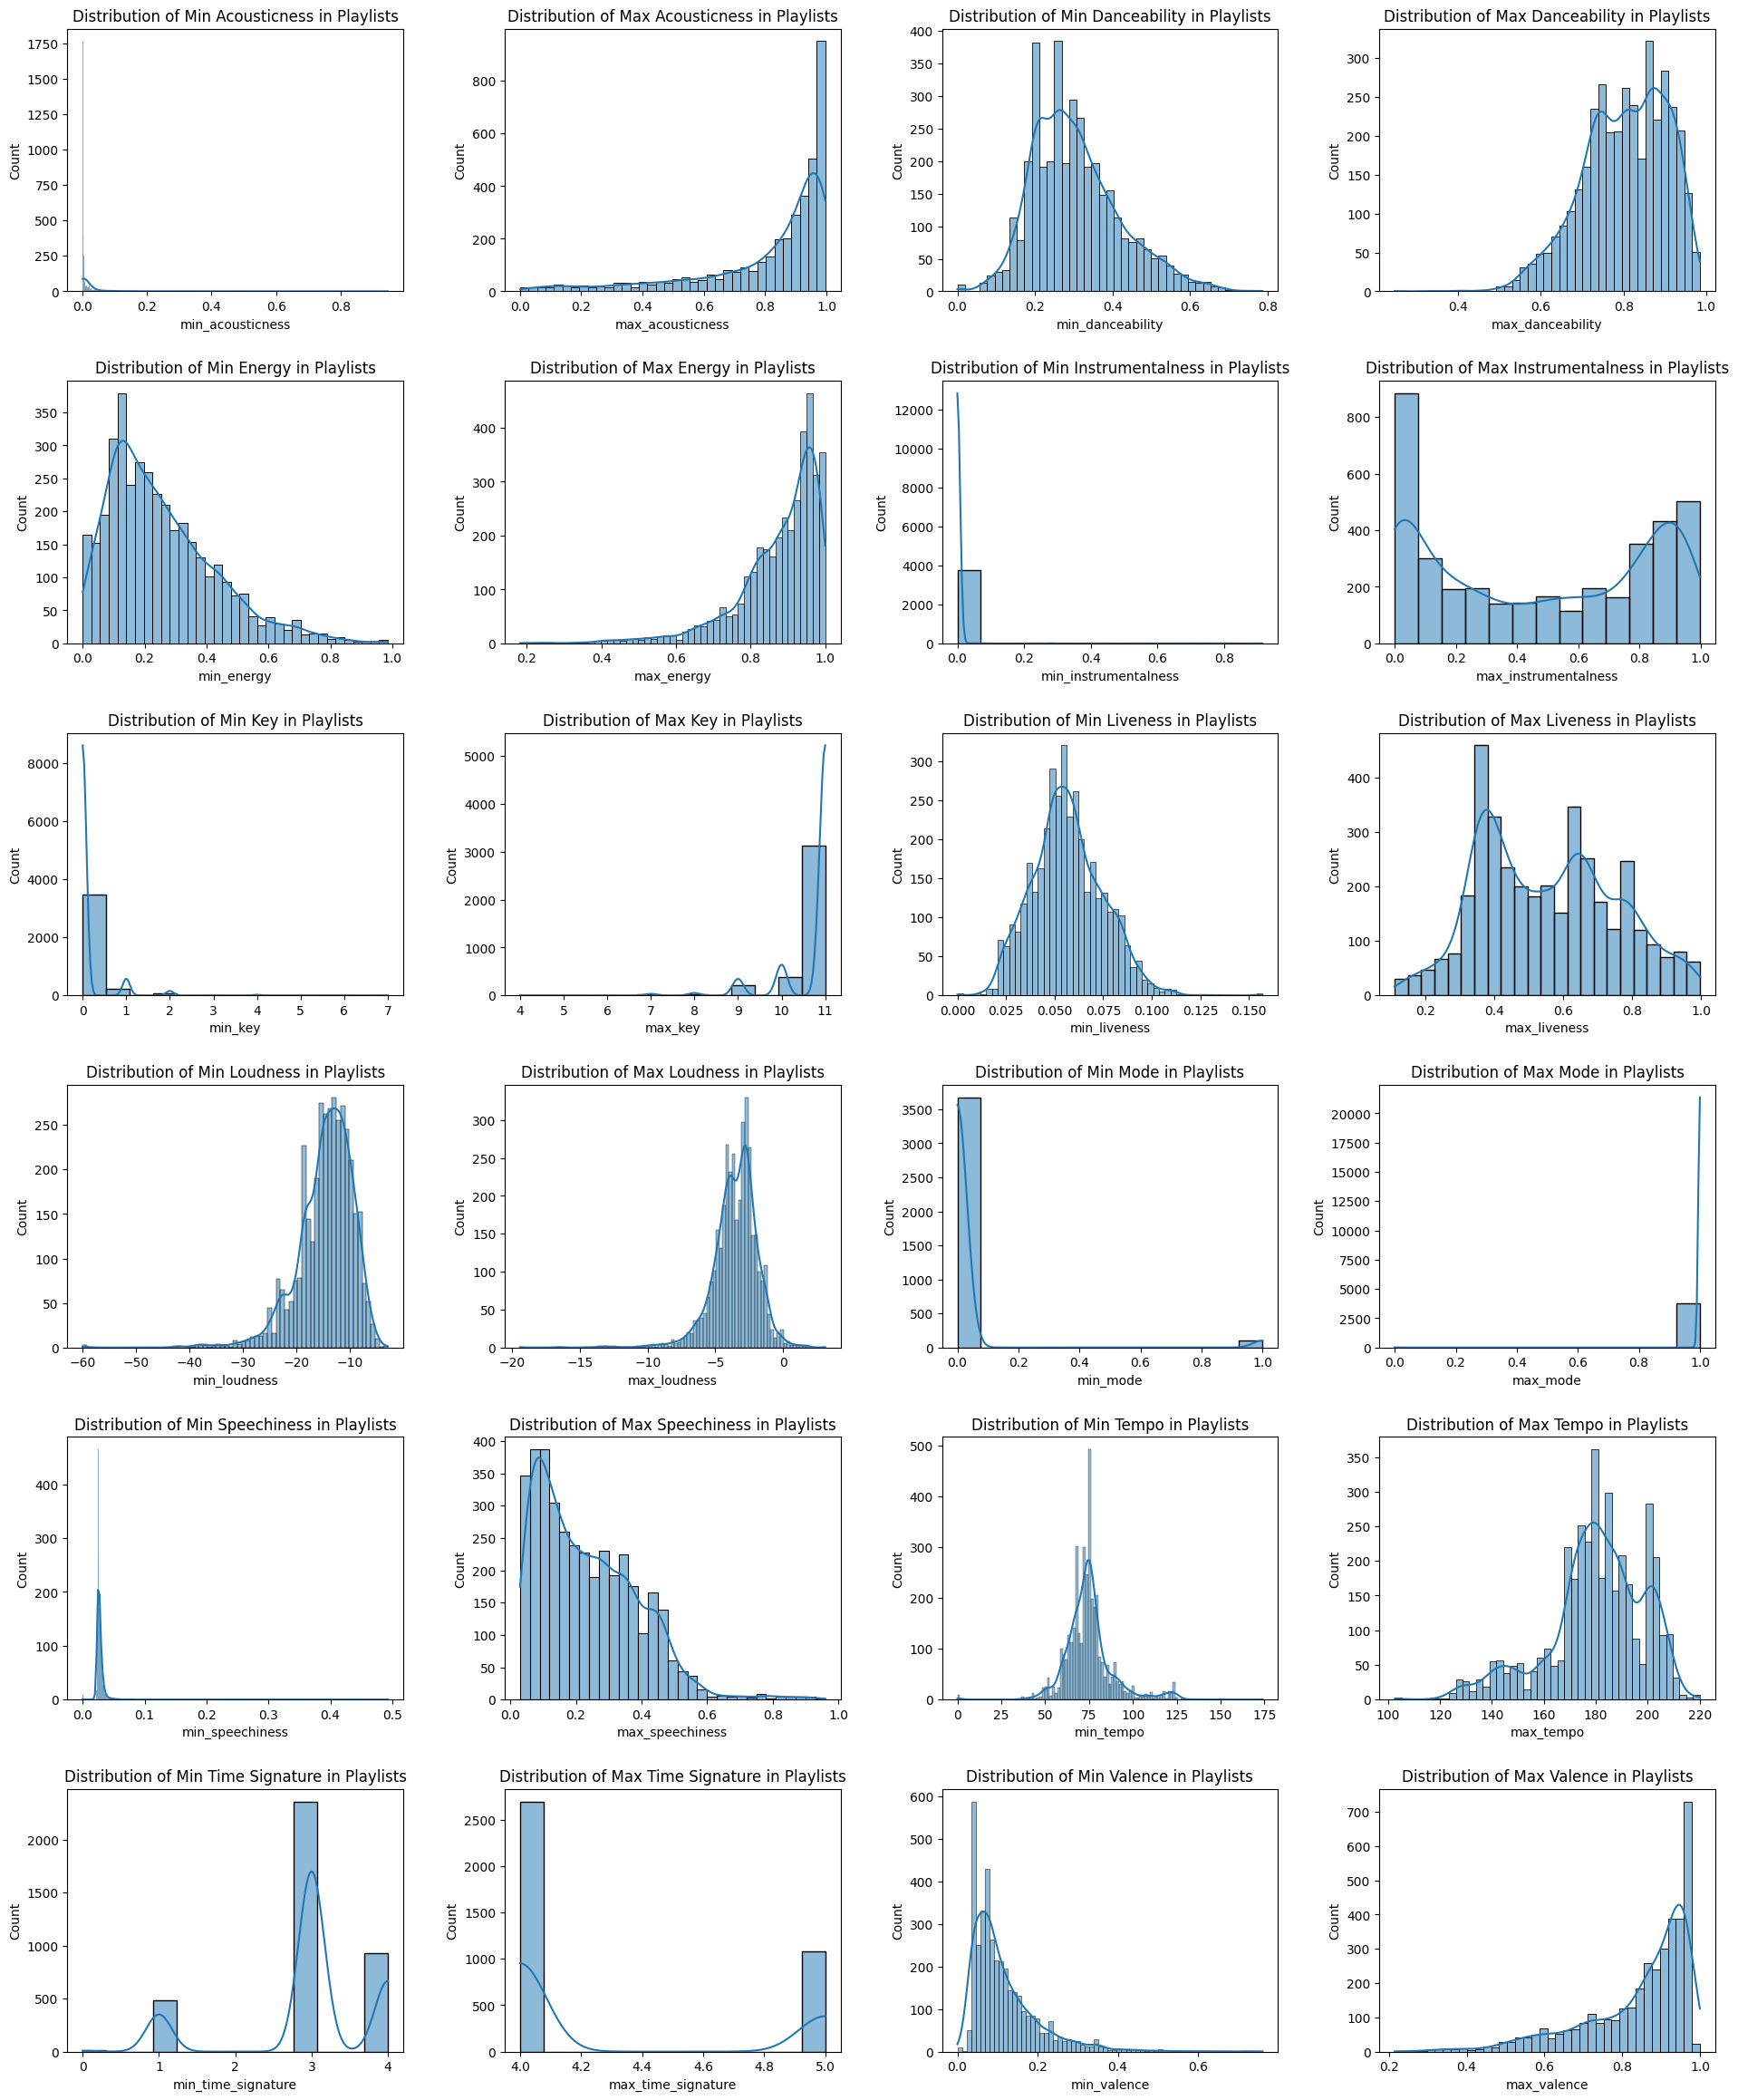

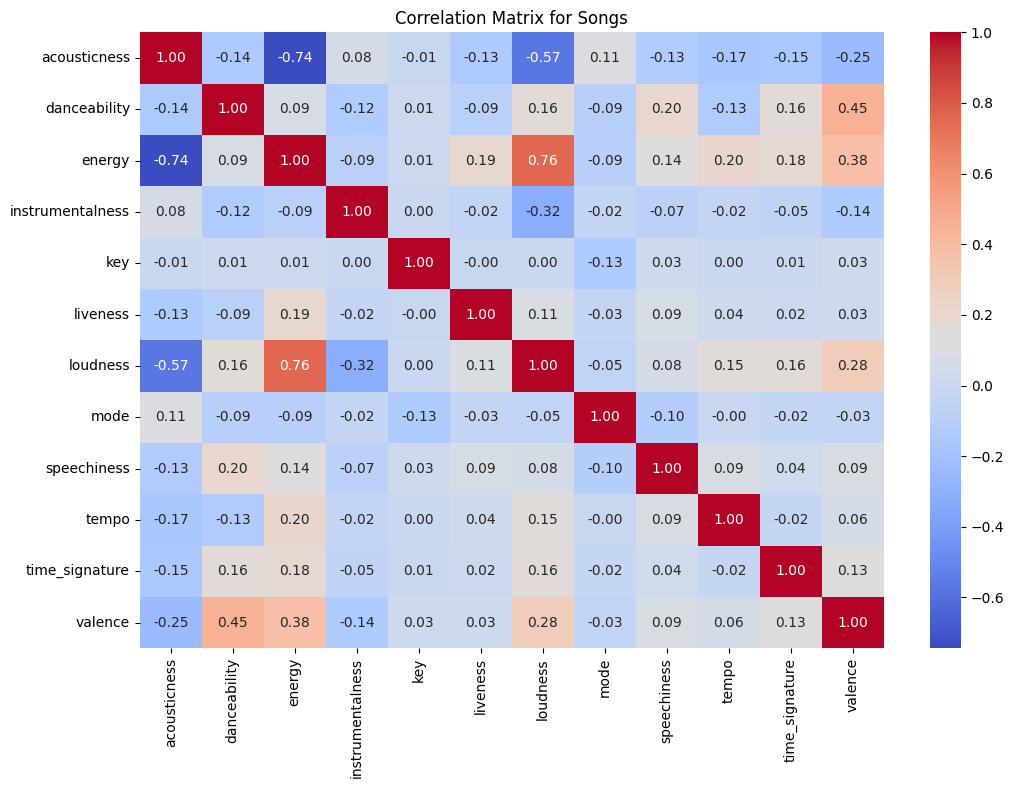

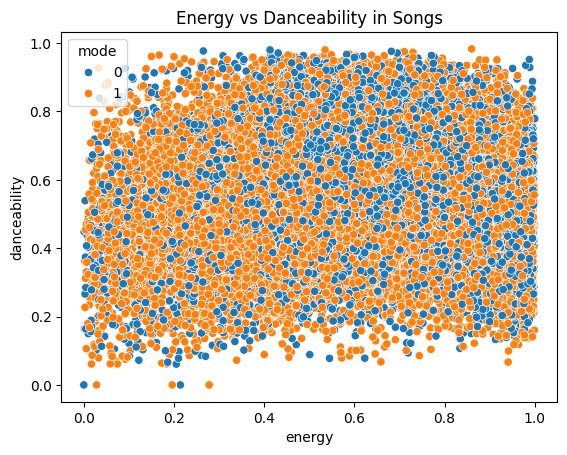

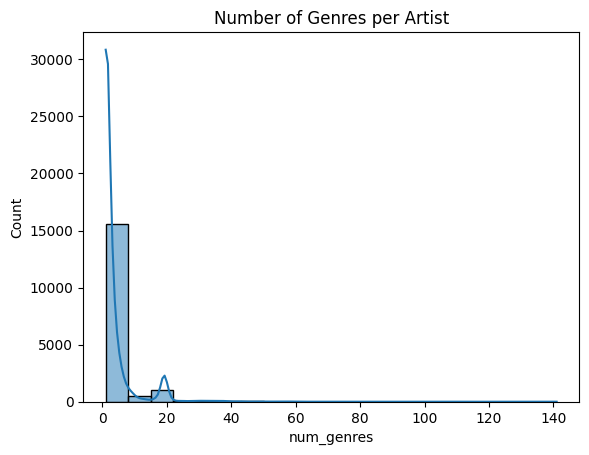

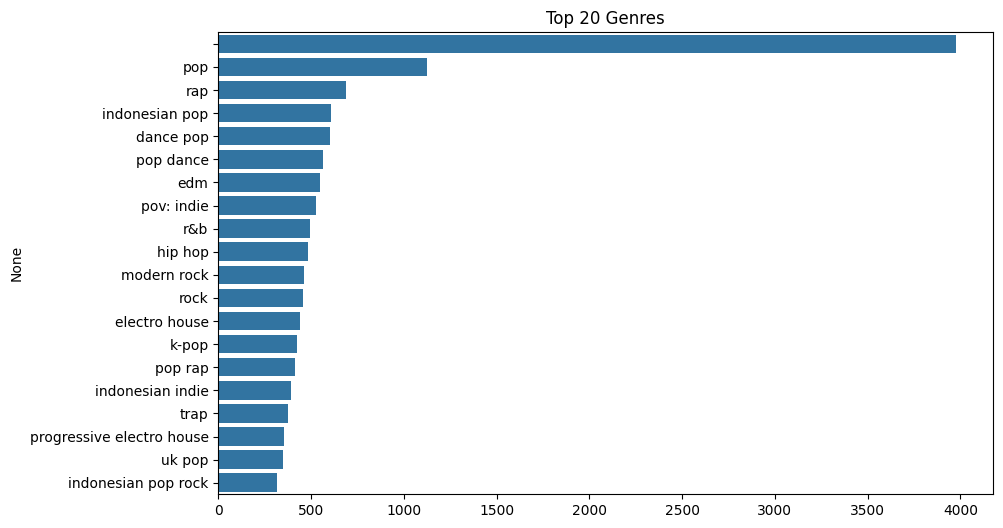


Unique Values in Songs Table:
song_id: 41652 unique values
song_name: 32165 unique values
artist_ids: 15068 unique values

Unique Values in Playlists Table:
playlist_id: 3779 unique values
playlist_creator_id: 1314 unique values
playlist_top_artist_ids: 3727 unique values
playlist_top_genres: 3553 unique values
playlist_items: 3754 unique values

Unique Values in Artists Table:
artist_id: 17333 unique values
artist_name: 17197 unique values
artist_genres: 7113 unique values


In [2]:
import sqlite3
import pandas as pd # type: ignore
import numpy as np# type: ignore
import seaborn as sns# type: ignore
import matplotlib.pyplot as plt# type: ignore

# Connect to the SQLite Database
# Replace 'your_database.db' with the actual path to your SQLite database file.
conn = sqlite3.connect('../data/main.db')

# Load data into pandas DataFrames
songs_df = pd.read_sql_query("SELECT * FROM songs", conn)
playlists_df = pd.read_sql_query("SELECT * FROM playlists", conn)
artists_df = pd.read_sql_query("SELECT * FROM artists", conn)

# Close the connection when done
conn.close()

# Simple EDA

# 1. Overview of the Data
print("Songs Table Overview:")
print(songs_df.info())
print("\nSongs Table Summary Statistics:")
print(songs_df.describe(include='all'))

print("\nPlaylists Table Overview:")
print(playlists_df.info())
print("\nPlaylists Table Summary Statistics:")
print(playlists_df.describe(include='all'))

print("\nArtists Table Overview:")
print(artists_df.info())
print("\nArtists Table Summary Statistics:")
print(artists_df.describe(include='all'))

# 2. Checking for Null Values
print("\nNull Values in Songs Table:")
print(songs_df.isnull().sum())

print("\nNull Values in Playlists Table:")
print(playlists_df.isnull().sum())

print("\nNull Values in Artists Table:")
print(artists_df.isnull().sum())

# 3. Checking for Duplicates
print("\nDuplicate Rows in Songs Table:", songs_df.duplicated().sum())
print("Duplicate Rows in Playlists Table:", playlists_df.duplicated().sum())
print("Duplicate Rows in Artists Table:", artists_df.duplicated().sum())

# 4. Checking for Missing Data
# For numeric columns, checking if there are NaNs
print("\nMissing Data Check (NaNs) in Songs Table:")
print(songs_df.isna().sum())

print("\nMissing Data Check (NaNs) in Playlists Table:")
print(playlists_df.isna().sum())

print("\nMissing Data Check (NaNs) in Artists Table:")
print(artists_df.isna().sum())

# 5. Analyzing Distributions
# Distribution of danceability in songs
song_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 
            'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 
            'time_signature', 'valence']

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))  # Adjust the grid size as needed
fig.tight_layout(pad=5.0)  # Adjust space between plots

# Loop through each feature and create a subplot
for ax, feature in zip(axes.flat, song_features):
    sns.histplot(songs_df[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature} in Songs')

# Display the merged plot
plt.show()
# Distribution of energy in playlists
playlist_features = ['min_acousticness', 'max_acousticness', 'min_danceability', 'max_danceability', 'min_energy', 'max_energy', 'min_instrumentalness', 'max_instrumentalness', 'min_key', 'max_key', 
            'min_liveness', 'max_liveness', 'min_loudness', 'max_loudness', 'min_mode', 'max_mode', 'min_speechiness', 'max_speechiness', 'min_tempo', 'max_tempo', 
            'min_time_signature', 'max_time_signature', 'min_valence', 'max_valence']

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 24))  # Adjust the grid size as needed
fig.tight_layout(pad=5.0)  # Adjust space between plots

# Loop through each feature and create a subplot
for ax, feature in zip(axes.flat, playlist_features):
    sns.histplot(playlists_df[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature.replace("_", " ").title()} in Playlists')

# Display the merged plot for all playlist features
plt.show()

# 6. Correlation Analysis
# Select only numeric columns for correlation matrix
numeric_columns = songs_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
songs_corr = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(songs_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Songs')
plt.show()

# Identify the strongest correlations
# Unstack the correlation matrix and sort the values to find the strongest correlations
strongest_corr = songs_corr.unstack().sort_values(ascending=False).drop_duplicates()

# Extract the top positive and negative correlations (excluding 1.0 self-correlations)
top_positive_corr = strongest_corr[1:6]  # Top 5 strongest positive correlations
top_negative_corr = strongest_corr[-5:]  # Top 5 strongest negative correlations

# Display the results
print("\nTop 5 Strongest Positive Correlations:")
print(top_positive_corr)

print("\nTop 5 Strongest Negative Correlations:")
print(top_negative_corr)

# Explanation of the Correlation Matrix
print("\nExplanation of the Correlation Matrix:")
print("The correlation matrix displayed above shows the pairwise correlations between various numeric audio features in the songs dataset.")
print("Here are some of the most significant correlations observed:")

# Positive correlations explanation
for (feature1, feature2), corr_value in top_positive_corr.items():
    print(f"- {feature1} and {feature2} have a strong positive correlation of {corr_value:.2f}. This suggests that when {feature1} increases, {feature2} also tends to increase.")

# Negative correlations explanation
for (feature1, feature2), corr_value in top_negative_corr.items():
    print(f"- {feature1} and {feature2} have a strong negative correlation of {corr_value:.2f}. This indicates that when {feature1} increases, {feature2} tends to decrease.")


# 7. Analyze relationships (example: Energy vs Danceability)
sns.scatterplot(data=songs_df, x='energy', y='danceability', hue='mode')
plt.title('Energy vs Danceability in Songs')
plt.show()

# 8. Analyzing Artist Genres
# Number of genres per artist
artists_df['num_genres'] = artists_df['artist_genres'].apply(lambda x: len(str(x).split(',')))
sns.histplot(artists_df['num_genres'], bins=20, kde=True)
plt.title('Number of Genres per Artist')
plt.show()

# Most common genres
all_genres = artists_df['artist_genres'].str.split(',', expand=True).stack().value_counts()
top_genres = all_genres.head(20)

# Plotting the top genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 20 Genres')
plt.show()

# 9. Checking for Unique Values in Categorical Columns
print("\nUnique Values in Songs Table:")
for column in songs_df.select_dtypes(include='object').columns:
    print(f"{column}: {songs_df[column].nunique()} unique values")

print("\nUnique Values in Playlists Table:")
for column in playlists_df.select_dtypes(include='object').columns:
    print(f"{column}: {playlists_df[column].nunique()} unique values")

print("\nUnique Values in Artists Table:")
for column in artists_df.select_dtypes(include='object').columns:
    print(f"{column}: {artists_df[column].nunique()} unique values")
